In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 3.2
N= 100  : pi= 3.36
N= 1000  : pi= 3.184
N= 10000  : pi= 3.1544
N= 100000  : pi= 3.148
N= 1000000  : pi= 3.14306


N= 10000000  : pi= 3.1417296


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

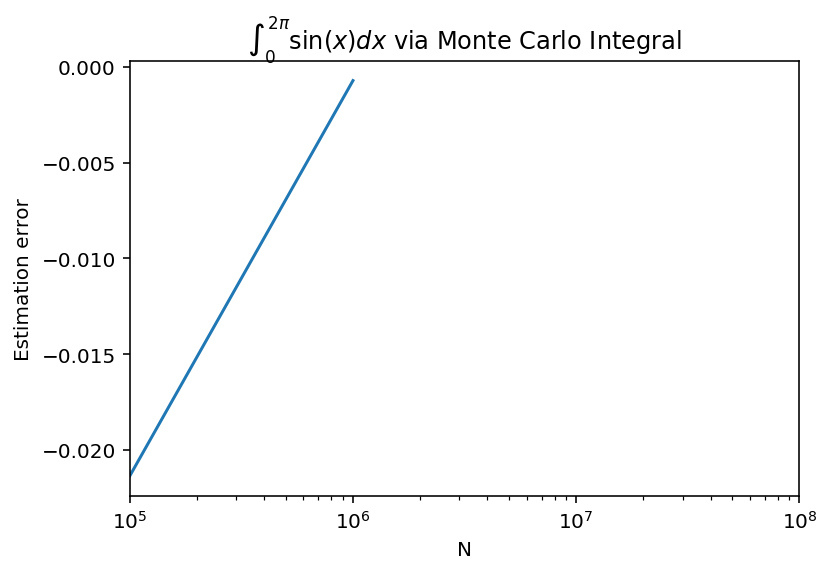

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGiV21kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAW5ZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcFzn+xmkY3zL3xjBgvJiGvfuE3NpyzMJSD9qN
ofJxod69BtsnClQwpCc0cFx2Zd1Hh2GntxME+aJccD1dUAXH/ms9Kh/vXT+O5QQpQV0RP1VSyHj8
dJapwE+5Vgk+8TCyh81WYf5hbS+GLg2haUHQAnDGcf/l0U6TDzEkyVZxljNX0qiIbfLdHZNANFyx
Wsq1o+v3pMoFVURwoeSvpuxhj55Lpa7mlp3Oe5uuw+FKl06I/AQ6phX9cdWHXPTXRrPEkfjxAFHB
hWCONT4repDlYVk1rpLTJWeD3vPpfUCIAN6JTqlmcUT0qFui+WtpQOPZwNZGuCGpTwLBUDvHL7UQ
WZqCcBPbLnrgPst9p9v9Hn1rY9f4dfCEEpbCWNegWuvOlKVamLzakni/O+Rb43Iq4lQANQAApYuJ
pTUH/Z73yX0EGj9tTV/6Ft6OkXZiynwxWuzACJCGhGGbrRhqibuNZ4Ap7vFVKyvNWZ7O18myfqHh
DoqOStvB/3YhivmO5hTPv+v0c49asjy4ivDXi8Br+gVfLS+n6v6wEfEy9Xh4Ik/dDv3aNK/lEL6P
PcIMGkKnLXOl7xReeFqnSuBRrUgAAGcCYCNopfmc9n66Gk88EJDyZ4frTWrIxmXDzW7wXRRkIg0q
Um3SzD9OqSmb0IkOsSSs64jNlRx2TOhwBCT9T2Ma+7cD/+HkPqYpslYbhZ8W/QhUBr6IMadUp0C3
orIBh98ZWgVLHJ4FV9USGbcPnC/J8YrjxOII8M5vU0Dm7sVrL7uVek06ZIvvlac5nYuNWfEcv/Ga
ebfhBtn9WJ3wKjibHuqoePK2oL5c05bAqRx7pZsX60r4RvkyqDOUyV1gMIk7fuw2dYi5I0eXmG/m
gc0yMPudEPuEFb062zlY5HLOd60SPg9dQFJcY6M4NlclwiQMIEldaXE3VPiK1zvHude8DgzA0nz4
c8E7H2UCupo9nvO+aQOjn2FilZm+vqdaB/9ATSSTVgIVQYT4ULEMXMCADsjLDVrL1vUxpdviCPSB
2jBnsJiYmAQfCTjqG82gRcItqkOsGL2zmtLvo1cMT5kXGqcvcAp280a7V9ZLms0Wb0PyDJzApt3+
1JfbCqW5BdDu7xUB2gzCKT5x0nW4TFQaYN+HblhnV9weHs9qP7aiR3hSmmDFbcSV5DRyQ8X0vqUm
7ICcPtn89Lhwjc7leQmD4ywvyz/q5Ea8TQu/16UX/raw+6y1HdRlFw2kXlqanFWuWopFI+pn52Pc
BTp63IGXBPc2LozT0kuu1wbJZPar4cL3GD0E/rhfUeZA9h7nf8QEwfbKiOSJ4CCxDHXjqFTJ9uB/
Tnc0fn3xe1kg3BIsL/Wb0tKeL1fMUr70PIiAPT3xQU258SnmFO4tHDKBR3Slf4JrItAKhGy/UHGx
MPPl/vpcWneS0LaWcruo1Gr/FGLGfT8ckrPY9vxQNQciqeU04QAAAU9BmiRsQz/+nhBnbHc6ZXpe
qsIFoBMMpq3zCkr8+138pSepc+2KV3HHdNE4GU9praz9mphSMoPmkXlUTveHgv7J0/VmIaqZ03aL
59tUy8WunGfry8MdmWOdEnhysRG+pJVYJ1/Lx18e3xH1jP95xfbixl7BU/WqxkXG2qQjwgaTA+JD
Gylm2fwn19IF70YfZaRrGO2Rwd97NDCZF4dShPh8mPpUJuSt/7AGk27nFT0oF5JMr2i4IZrp0mp9
x16bFy16RdEYLsHsEaKYmLMDiyEHPrqy+rfUHOd+/StLG64WCWewjpkMloS8yEmuM59jzxeHRJtb
LVH/ZE1OxcymIP3eIGdvAiywpLKad3Rq6ZdK5rS9rHGavqfRvwAJv+3zvVWOPf56oxC3CO4GRyts
gI0l9c7E22PiEYGLbPVotxqqn9AXrvog7a7z0GZa407iQAAAAJJBnkJ4hH8EfdddaltupEr5C1h4
vgvM2DGYcUisDTpYBG9qHc8wycg88wf60m8xmx72IFTrqlUBktEpJekEek4TUAJphS7jgly7KxQ3
3fT2xOp8twg7PlldPTPgu0zwsTZpUxf0v3TUgK3vzgMUaOFovnfH1TwKOzb6sYevQBqqAu4ZEeuJ
un5dYuwzTRa5yad3oQAAAEwBnmF0R/8H68xB5FovL/sAAAMAAG0SdqmWD0yzoSa5/jnXAB69HTqU
sSk//XF1bGKTyH6TEto5YOu6NuUck8hCwHea8UsmLk3jqvboAAAAaAGeY2pH/wftu6rAr+tDemwk
AAADAFEJTLCB541jHJzUACEGhZ2YLxd4DaYq8KkHKE7jQUaLOs0s6hnIpL/gvZRxj+U9Ik1KLVLK
HpU/wwauiOnqY8tEBfbDVr/z+jStceni875xtoHdAAABD0GaaEmoQWiZTAhn//6eEH/ixzzDB8oT
TLTIQFknnOAAAl+NotI+l

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=40)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=500)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGpbW1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAYxZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8if99hE4DA8etUgeNM/GoTg/s00RyBBOQwXE7Rygg8q0sj
4EWnhwrQ/VlP1i9+Dbuz+3DfcQG/M0FvmUraEa97CAHl33rvMBYuPGyNjH3PImh4hIb/vSW+gjE6
FiP/oD5K0dyjRnJVSetJybovpMwSJaRUC3YBGUEug2prbCcEtTUk7+DUBJnt8KO+Z8CtieKCJ+v7
Pva7XIih/DwnaSL2/VuBv1DoQBvFonnn6eJDIwW9Ua+CQAV2BIk0YwTnvdU0eWvtC0VNUz/zmGBs
fn9x095y4dD4Z0pd7tlpC3dfZ7k4BNHThYiYQG/wdwT02vsbEPC4ihRUhZHv2XC4Y7duHkb+5isX
lnqV85sU52hMOhhZ9x+wKX7eUYHrNQ5LFnWieYLHEGCeEY5c2KDJ7CN2TUQAM3ZDgDpS0Zvu9kr7
WNGlN1qcdRxuhR3dZ/aXky+QpQ36S7gnsnCd9opd08ZD+9lObRX1QEVMp3kmH2aAxbiQWPDSqs5D
hcce7BBUWRCOKJ6WiC2FBwpIHHs3y5GATgpTwdtBzF3IhtPg/zkWeem+gfeZLlLk4fqALXqf2/Dp
0QglLYSxr0C1150pSrUxebUk8X53yLfG5FY527g5eVUx3/4TYxKGHUleyPBlWpC0PlAtw2JB8f3l
/E2vpzslkV7rgi9iUSoFuJp7yg5ZKzXzJwQBL4mTlH+RiQ/8OtyrHHHu8XLIRsQDZ2JWUsNfcPWq
ItjFgLC0ZNbXi/EA6e0MV174N761OcwwYI3ls7qqRUeu0/PwktX92fusTtRh2HByqUHBAyScAiPH
Nuo9ao1a3TwUZ90gFbeQ5TeKJVb6IMGSMNKM6Z7xReeDQBD5yWU6QFfQZw+Z4ISHkzzpiBcIWLiH
mt3guijIRBpUpNulmH6dUlM3cyEydIPvXlvRY47JnQ3/fBUqdfzdNZTpIbM28imyRO2JoJGKn1Aa
+iDGnVG8jncCzp+jfT/PNX92ljtUdEhm3D5wvyfGK3dOUq3CaqE0Dm7sVo8Aa77Db1ND1TnM7Fxq
z8l0Y8Zp5uBR+nbJ1xmcdm+fi2qoePK2oL5eM2HN9goYOMST84SPkJIGe14lb4bEGESdv52vtYi5
I0eY+u/mgc0yMPuGTr4MFb062zlZZ4LOd60SPg9dQ0pVT+63pc2FwiQMIEaGiFHxJevdUlGbm1uu
PY0jlP8w77J2PsoFdT5GHvO+aQOjn2FEXJoOVKdaE4/rFoI82gIVVhyASMn86873r0IoDVrL1vUx
pdziCPSB2jBnsJxaKfQgS4rim82gRcIqNiyRmL2zmtLuQJcMT5kXGqcvb+Op6ue519ZURbfh8iH5
Bk5gU28VSeZ7SgqDDjDu7xUB2gzSGT5x0nW4TFQaYLBHc5zxlM52N01PdEPlp3hSmcTFb3xLyGjs
2/wA935KE3bSF5JiUTrvNzuV5CYPjLC/SIC1lA3iaF3+vSi/9xDPm02Z38YOJP4BICr/jHXLUUik
HVj52PcBTp63IG/BPc2LozT0ksbQAbJZPar4cL5+AAv/rhfUeYq8XVBOCYmrNo27QYoJaLEMdeO5
LqpzsDJSgKyum9zRtZCf0Eif6zelpTxcXNilfeh5EQCZk4qCm3PiU8wtaFo4ZQKO6Ur1xNOLnBUI
2X6dJGJh58v99Liw7yWhbSzld1GqGf3gxiw6TT6XwaCZUAAzW2g5CjgzSQAAANxBmiRsQz/+nhBn
bHc6ZXpeqsIFoBMMpq3zCkr8+138pSepc+2KV3HHdNE4GU9praz9mphSMoPmkXlUTveHgv7J0/Vm
IaqZ03aL59tUy8WunGiKJ8QAKnZHke1RiuGkcbAtiB1L7k9jvLjHv595aTKhxtB/mmK7HHiQCTpY
LK1eTFBYMnsBvNVYBnahc6Jv/A90s1Bz/jK8FGltamTRWPvfbAaEFXt5x8aWH+wKM5ra7F+03etN
j7s9x3BpsrdNni6gMBLcetxTDM6bSNx/vwnws3fmt4ZWncsT6xGAAAAAWEGeQniEfwR9111qW26k
SvkLWHi+C8zYMZhxSKwNOlgEb2odzzDJyDzzB/rSbzGbHvYgVOuqVQqqM94uTc1ax5EwlOAQAfzK
KsnRwSG9cn3Xgww69z+y5akAAAAqAZ5hdEf/B+vMQeRaLy/7AAADAABtEnaplmkGjGxb9+xJ2MUP
oVbYDIR6AAAAKgGeY2pH/wftu6rAr+tDemwkAAADAFEJTLN0LA+B4wY3wcDxhkYwtN3pFQAAAGZB
mmhJqEFomUwIZ//+nhB/4sc8wwfKE0y0yEBZJ5zgAAJfjaLSPpZtdS6sx/TEFMsBP/bJ6iVoAAuM
Z/DAleUbH+CVUd/uPoKhmMmZUwiGNaWaX5mBHdCbaRL0IMjldtwgptBSQMEAAAAyQZ6GRREsI/8C
hPKwcr9uaBUwdSAANY1qlUwzRQzSqRE1qrhy43KWKm89RLXgIWsxYRkAAAArAZ6ldEf/B+dxR5Os
SsydqaUAAAMAHaWqZZsxT